In [530]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [531]:
cars_data = pd.read_csv("Car details v4.csv")
print(cars_data.head())
print(cars_data.shape)

            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max Torque Drivetrain  Length   W

In [532]:
cars_makers = cars_data['Make'].unique()
'''cars_makers.sort()
z={j:i+1 for i,j in enumerate(cars_makers)}
print(z)
cars_models = cars_data.loc[cars_data['Make']=='Honda','Model'].unique()
final_list={}
_counter = 1
_counter2 = 1
for i in cars_makers:
    _temp = cars_data.loc[cars_data['Make']==i,'Model'].unique()
    _temp.sort()
    #x = {j:_counter+_counter2 for j in _temp}
    x={}
    for j in _temp:
        x[j] = float(str(_counter)+'.0'+str(_counter2))
        _counter2 += 1

    final_list[i]=x
    cars_data['Model'] = cars_data['Model'].replace(x)
    _counter2 = 1
    _counter+=1

print(final_list)
cars_data['Make'] = cars_data['Make'].replace(z)'''


"cars_makers.sort()\nz={j:i+1 for i,j in enumerate(cars_makers)}\nprint(z)\ncars_models = cars_data.loc[cars_data['Make']=='Honda','Model'].unique()\nfinal_list={}\n_counter = 1\n_counter2 = 1\nfor i in cars_makers:\n    _temp = cars_data.loc[cars_data['Make']==i,'Model'].unique()\n    _temp.sort()\n    #x = {j:_counter+_counter2 for j in _temp}\n    x={}\n    for j in _temp:\n        x[j] = float(str(_counter)+'.0'+str(_counter2))\n        _counter2 += 1\n\n    final_list[i]=x\n    cars_data['Model'] = cars_data['Model'].replace(x)\n    _counter2 = 1\n    _counter+=1\n\nprint(final_list)\ncars_data['Make'] = cars_data['Make'].replace(z)"

In [533]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [534]:
#categorical part 1
print(cars_data['Fuel Type'].unique())
print(cars_data['Transmission'].unique())
print(cars_data['Owner'].unique())
print(cars_data['Seller Type'].unique())
print(cars_data['Drivetrain'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric' 'CNG + CNG' 'Hybrid'
 'Petrol + CNG' 'Petrol + LPG']
['Manual' 'Automatic']
['First' 'Second' 'Third' 'Fourth' 'UnRegistered Car' '4 or More']
['Corporate' 'Individual' 'Commercial Registration']
['FWD' 'RWD' 'AWD' nan]


In [535]:
cars_data['Fuel Type'] = cars_data['Fuel Type'].replace({'Petrol':1, 'Diesel':2, 'CNG':3, 'LPG':4, 'Electric':5, 'CNG + CNG':6, 'Hybrid':7, 'Petrol + CNG':8, 'Petrol + LPG':9})
cars_data['Transmission'] = cars_data['Transmission'].replace({'Manual':0,'Automatic':1})
cars_data['Owner'] = cars_data['Owner'].replace({'First':1, 'Second':2, 'Third':3, 'Fourth':4, 'UnRegistered Car':0, '4 or More':5})
cars_data['Seller Type'] = cars_data['Seller Type'].replace({'Corporate':1, 'Individual':2, 'Commercial Registration':3})
cars_data['Drivetrain'] = cars_data['Drivetrain'].replace({'FWD':1, 'RWD':2, 'AWD':3})

In [536]:
cars_data = cars_data.dropna(subset=['Engine','Max Torque','Max Power'])
#cars_data = cars_data.dropna(subset=['Max Torque'])
#cars_data = cars_data.dropna(subset=['Max Power'])
#cars_data['Engine'].isna().fillna(0).astype(int)
#cars_data['Max Torque'].isna().fillna(0).astype(int)

In [537]:
import re
def extract_float(mileage_str):
    match = re.search(r'(\d+)', str(mileage_str))
    return float(match.group()[0]) if match else None

cars_data['Engine'] = cars_data['Engine'].str.extract('(\d+)').astype(int)
cars_data['Torque'] = cars_data['Max Torque'].str.extract('(\d+)').astype(int)
cars_data['Power'] = cars_data['Max Power'].str.extract('(\d+)').astype(int)

cars_data.drop(['Max Power','Max Torque','Length','Width','Height'],axis=1,inplace=True)

In [538]:
cars_data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Drivetrain,Seating Capacity,Fuel Tank Capacity,Torque,Power
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,1,0,Pune,Grey,1,1,1198,1.0,5.0,35.0,109,87
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,2,0,Ludhiana,White,2,2,1248,1.0,5.0,42.0,190,74
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,1,0,Lucknow,Maroon,1,2,1197,1.0,5.0,35.0,112,79
3,Toyota,Glanza G,799000,2019,37500,1,0,Mangalore,Red,1,2,1197,1.0,5.0,37.0,113,82
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,2,0,Mumbai,Grey,1,2,2393,2.0,7.0,55.0,343,148


In [539]:
from sklearn.preprocessing import LabelEncoder
model_encoder = LabelEncoder()
make_encoder = LabelEncoder()
color_encoder = LabelEncoder()
location_encoder = LabelEncoder()
    
cars_data['Model'] = model_encoder.fit_transform(cars_data['Model'])
cars_data['Make'] = make_encoder.fit_transform(cars_data['Make'])
cars_data['Color'] = color_encoder.fit_transform(cars_data['Color'])
cars_data['Location'] = location_encoder.fit_transform(cars_data['Location'])

In [540]:
cars_data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Drivetrain,Seating Capacity,Fuel Tank Capacity,Torque,Power
0,7,99,505000,2017,87150,1,0,56,7,1,1,1198,1.0,5.0,35.0,109,87
1,19,769,450000,2014,75000,2,0,40,15,2,2,1248,1.0,5.0,42.0,190,74
2,8,987,220000,2011,67000,1,0,39,8,1,2,1197,1.0,5.0,35.0,112,79
3,30,473,799000,2019,37500,1,0,41,13,1,2,1197,1.0,5.0,37.0,113,82
4,30,529,1950000,2018,69000,2,0,45,7,1,2,2393,2.0,7.0,55.0,343,148


In [541]:
cars_data.corr()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Drivetrain,Seating Capacity,Fuel Tank Capacity,Torque,Power
Make,1.000000,0.156637,-0.041175,0.024163,0.049816,0.014216,-0.139227,0.038810,0.029935,0.012093,-0.007526,0.020116,-0.025547,0.223342,0.025775,-0.089933,-0.124091
Model,0.156637,1.000000,-0.078866,-0.030988,0.027946,0.095900,-0.194390,-0.007765,0.028303,0.044602,0.007167,-0.013276,0.064474,0.129702,-0.024061,-0.031456,-0.086894
Price,-0.041175,-0.078866,1.000000,0.313436,-0.149907,0.108313,0.479629,-0.115100,-0.130072,-0.062565,-0.096955,0.615328,0.528379,-0.040704,0.584409,0.671291,0.781417
Year,0.024163,-0.030988,0.313436,1.000000,-0.298010,-0.011573,0.182994,-0.077694,-0.061176,-0.375902,-0.035326,-0.004100,0.062927,-0.005683,0.066264,0.105458,0.114435
Kilometer,0.049816,0.027946,-0.149907,-0.298010,1.000000,0.141974,-0.107340,0.036724,0.060162,0.133015,0.024011,0.061900,0.012673,0.124398,0.054769,0.040412,-0.032542
Fuel Type,0.014216,0.095900,0.108313,-0.011573,0.141974,1.000000,0.037592,-0.051175,0.015327,0.085784,0.027507,0.255027,0.266115,0.241457,0.310725,0.381648,0.115097
Transmission,-0.139227,-0.194390,0.479629,0.182994,-0.107340,0.037592,1.000000,-0.091550,-0.147858,0.007558,-0.113680,0.481235,0.438219,-0.048514,0.508044,0.576691,0.606560
Location,0.038810,-0.007765,-0.115100,-0.077694,0.036724,-0.051175,-0.091550,1.000000,0.026444,-0.000422,-0.083037,-0.069759,-0.072974,0.038580,-0.098469,-0.116161,-0.115789
Color,0.029935,0.028303,-0.130072,-0.061176,0.060162,0.015327,-0.147858,0.026444,1.000000,0.009448,0.034625,-0.109463,-0.124583,0.046038,-0.102119,-0.116018,-0.156332
Owner,0.012093,0.044602,-0.062565,-0.375902,0.133015,0.085784,0.007558,-0.000422,0.009448,1.000000,0.038079,0.131801,0.109733,0.068260,0.068558,0.065194,0.050337


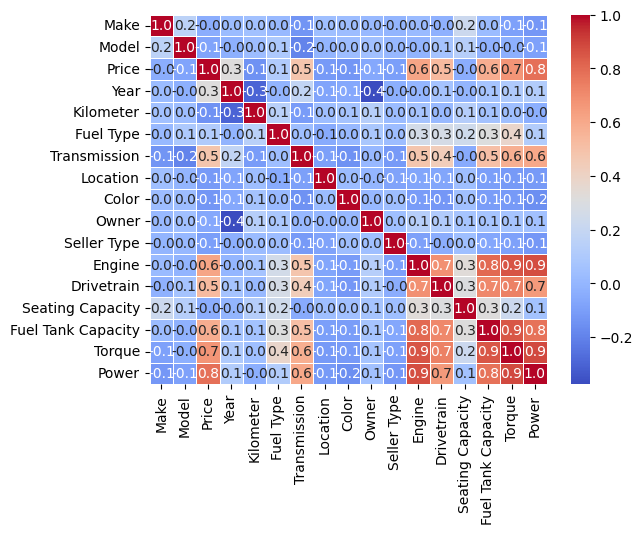

<Figure size 2000x1500 with 0 Axes>

In [542]:
sns.heatmap(cars_data.corr(), annot=True, cmap="coolwarm", linewidths=.5,fmt=".1f")
plt.figure(figsize=(20, 15))
plt.show()

In [543]:
X = cars_data.drop(['Price'],axis=1)
X.fillna(X.mean(), inplace=True)
print(X)
Y = cars_data['Price']

      Make  Model  Year  Kilometer  Fuel Type  Transmission  Location  Color  \
0        7     99  2017      87150          1             0        56      7   
1       19    769  2014      75000          2             0        40     15   
2        8    987  2011      67000          1             0        39      8   
3       30    473  2019      37500          1             0        41     13   
4       30    529  2018      69000          2             0        45      7   
...    ...    ...   ...        ...        ...           ...       ...    ...   
2054    18    959  2016      90300          2             0        66     15   
2055     8    396  2014      83000          1             0         1     15   
2056     6    437  2013      73000          1             0        67     14   
2057     1     11  2018      60474          2             1        12     15   
2058    18    130  2017      72000          2             0        25     15   

      Owner  Seller Type  Engine  Drive

In [544]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

In [545]:
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor()
model_rf = RandomForestRegressor()

model_lr.fit(xtrain, ytrain)
model_dt.fit(xtrain, ytrain)
model_rf.fit(xtrain, ytrain)


predictions_lr = model_lr.predict(xtest)
predictions_dt = model_dt.predict(xtest)
predictions_rf = model_rf.predict(xtest)

In [546]:
r2_score_lr = metrics.r2_score(ytest, predictions_lr)
print("R-squared:", r2_score_lr)
r2_score_dt = metrics.r2_score(ytest, predictions_dt)
print("R-squared:", r2_score_dt) 
r2_score_rf = metrics.r2_score(ytest, predictions_rf)
print("R-squared:", r2_score_rf)

R-squared: 0.7470847263655592
R-squared: 0.9349700627243769
R-squared: 0.9436199230134352


In [547]:
import joblib
joblib.dump(model_rf,'randomforest.pkl')
joblib.dump(model_encoder,'model_encoder.pkl')
joblib.dump(make_encoder,'make_encoder.pkl')
joblib.dump(color_encoder,'color_encoder.pkl')
joblib.dump(location_encoder,'location_encoder.pkl')

['location_encoder.pkl']